### Importing all libraries required.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### set it to convert scientific values


In [2]:
pd.options.display.float_format = '{:.2f}'.format 


### Regular expressions for string manipulation


In [3]:
import re


### Ignore warnings due to version problems


In [4]:
import warnings
warnings.filterwarnings('ignore')

### Read CSV file and check it's attributes before proceeding further.
### Reading CSV file with dtype object. I will draw correlation among few variables not all so when it needs i will just convert 
### those as per my need for better visibility. So many variables in correlation creates confusion when they don't add much value.


In [5]:
loan = pd.read_csv('loan.csv')

### check shape & datatype of loan data


In [6]:
print(loan.shape)
print(loan.info())
print(loan.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


# Data Cleaning Starts

### Check for duplicate rows in dataset based on id column

In [7]:
print(loan.duplicated(subset=None, keep='first').count())
dup=loan[loan.duplicated(['id'])]
dup

### Observations
### There are no duplicate rows in loan dataset

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [8]:
##Data Wrangling
#Rename columns - from credit.policy to credit_policy etc
# all the columns are properly named

### sum it up to check how many rows have all missing values

In [9]:
print('Number of empty Rows:')
print(loan.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

Number of empty Rows:
0


### sum it up to check how many columns have all missing values

In [10]:
print('Number of empty Columns:')
print(loan.isnull().all(axis=0).sum())
# Observation: There are 54 columns have all missing values.

Number of empty Columns:
54


### Lets find Which columns have all null values

In [11]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Calculate the percentage of null values in each column (rounded to 2 decimals)



In [12]:
null_percentage = loan.isnull().mean().round(2) * 100

### Find columns with more than 50% null values


In [13]:
columns_with_fewer_nulls = null_percentage[null_percentage > 50].index
columns_with_fewer_nulls

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

### Create a new DataFrame with only the columns that have less than 50% null values 

In [14]:
df_fewer_nulls = loan.drop(columns=columns_with_fewer_nulls)
df_fewer_nulls.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Checking now for nulls post processing 

In [15]:
df_fewer_nulls.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Drop additional columns we don't need these as these are mostly nulls.

In [16]:
df_fewer_nulls.drop(['url','id','desc','emp_title','last_pymnt_d','tax_liens'], axis=1, inplace=True)

In [17]:
df_fewer_nulls.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med',], axis=1, inplace=True)

In [18]:
df_fewer_nulls.shape

(39717, 46)

### Lets format employment length column to have only numbers. It may play important role in analysis further.

In [19]:
df_fewer_nulls.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [20]:
df_fewer_nulls.emp_length.fillna('0',inplace=True)
df_fewer_nulls['emp_length']=df_fewer_nulls.emp_length.str.extract('(\d+)')
df_fewer_nulls.emp_length

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

### pub_rec_bankruptcies can be cleaned for further analysis.

In [21]:
print("Before cleaning:")
print(df_fewer_nulls.pub_rec_bankruptcies.isnull().sum())

Before cleaning:
697


In [22]:
print("After cleaning:")
df_fewer_nulls.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(df_fewer_nulls.pub_rec_bankruptcies.isnull().sum())

After cleaning:
0


### Lets remove % symbol from intrest rate, revol_util columns so that it can be used in calculations

In [23]:
df_fewer_nulls['int_rate'] = df_fewer_nulls['int_rate'].str.rstrip('%')
df_fewer_nulls['revol_util'] = df_fewer_nulls['revol_util'].str.rstrip('%')

### convert amount columns into numeric data to find some correlation among important ones.

In [24]:
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
df_fewer_nulls[cols1] = df_fewer_nulls[cols1].apply(pd.to_numeric)

### lets remove the " months" apart from the string and convert the remaining numeric part to a float or integer 'loan_term' is the column containing values like '36 months'


In [25]:
df_fewer_nulls['term'] = df_fewer_nulls['term'].str.replace(' months', '').astype(float)

### Replace null values with random numbers between 0 and 100

In [26]:
def random_number():
    return np.random.randint(0, 101)

df_fewer_nulls['revol_util'] = df_fewer_nulls['revol_util'].apply(lambda x: random_number() if pd.isnull(x) else x)

## Univariate Analysis

### Lets take a look on important variable loan status in total loans issued

In [27]:
(df_fewer_nulls.loan_status.value_counts()*100)/len(df_fewer_nulls)

loan_status
Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: count, dtype: float64

In [28]:
# Observations
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off

### Lets take a look on important variable purpose of loan in total loans issued

In [29]:
(df_fewer_nulls.purpose.value_counts()*100)/len(df_fewer_nulls)

purpose
debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: count, dtype: float64

In [30]:
# Observations
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment(13%)
# Other is also one of the main area where loans were taken.


In [31]:
df_fewer_nulls.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

### Derived columns
### Lets derive some new columns using existing data as it may further used in analysis.
### create month and year columns separately

In [32]:
df_fewer_nulls.issue_d = pd.to_datetime(df_fewer_nulls.issue_d, format='%b-%y')
df_fewer_nulls['year']=df_fewer_nulls['issue_d'].dt.year
df_fewer_nulls['month']=df_fewer_nulls['issue_d'].dt.month

In [33]:
df_fewer_nulls['term']

0       36.00
1       60.00
2       36.00
3       36.00
4       60.00
         ... 
39712   36.00
39713   36.00
39714   36.00
39715   36.00
39716   36.00
Name: term, Length: 39717, dtype: float64

In [34]:
numerical_columns = df_fewer_nulls.select_dtypes(include=['number']).columns
categorical_columns = df_fewer_nulls.select_dtypes(include=['object', 'category']).columns

# Divide the dataset
numerical_data = df_fewer_nulls[numerical_columns]
categorical_data =df_fewer_nulls[categorical_columns]

# Print the columns for verification
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'acc_now_delinq', 'delinq_amnt',
       'year', 'month'],
      dtype='object')
Categorical Columns: Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies'],
      dtype='object')


### Basic statistics with .describe() - Quantitative Variables

In [35]:
df_fewer_nulls['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<Axes: xlabel='annual_inc'>

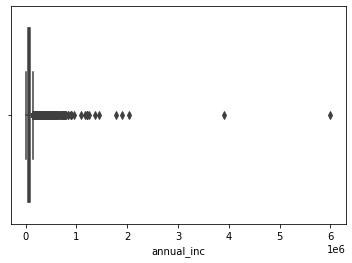

In [36]:
sns.boxplot(x=df_fewer_nulls.annual_inc)

In [37]:
print('Before Removal of Outliers :\n')
print(df_fewer_nulls['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

df_fewer_nulls = df_fewer_nulls[df_fewer_nulls["annual_inc"] < df_fewer_nulls["annual_inc"].quantile(0.99)]


Before Removal of Outliers :

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64


In [38]:
print('After Removal of Outliers :')
print(df_fewer_nulls["annual_inc"].describe())

After Removal of Outliers :
count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64


<Axes: xlabel='annual_inc'>

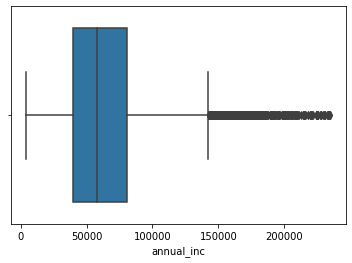

In [39]:
sns.boxplot(x=df_fewer_nulls.annual_inc)

### Defining function for detecting outliers

In [40]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Detecting and returning the actual outlier values
    outliers = data[(data < lower_fence) | (data > upper_fence)]
    return outliers

# Apply to your separated numerical data
outlier_data = detect_outliers_iqr(numerical_data)
print(outlier_data.isnull().sum())

member_id                  39691
loan_amnt                  38487
funded_amnt                38679
funded_amnt_inv            38717
term                       39717
int_rate                   39639
installment                38472
emp_length                 39717
annual_inc                 37874
dti                        39717
delinq_2yrs                35405
inq_last_6mths             36083
open_acc                   39202
pub_rec                    37601
revol_bal                  37220
total_acc                  39192
out_prncp                  38577
out_prncp_inv              38577
total_pymnt                38383
total_pymnt_inv            38276
total_rec_prncp            38745
total_rec_int              36560
total_rec_late_fee         37671
recoveries                 35499
collection_recovery_fee    35935
last_pymnt_amnt            35431
policy_code                39717
acc_now_delinq             39717
delinq_amnt                39717
year                       37904
month     

### Univariate Analysis on Loan amount-Quantitative Variables

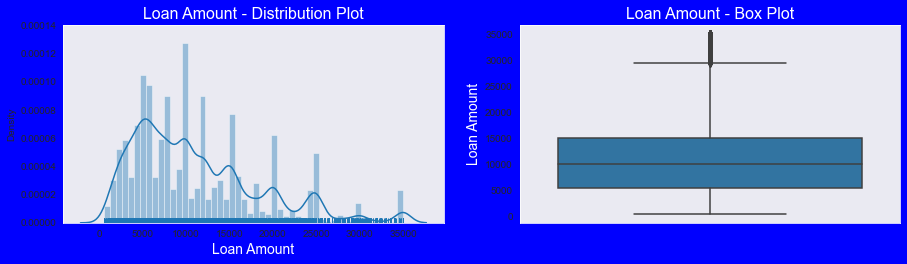

In [41]:
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df_fewer_nulls['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df_fewer_nulls['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

### Univariate Analysis on Intrest Rate-Quantitative Variables

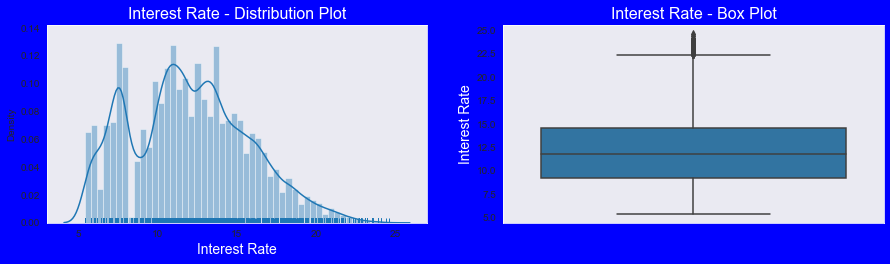

In [42]:
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df_fewer_nulls['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df_fewer_nulls['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

### Univariate Analysis on Annual Income - Quantitative Variables

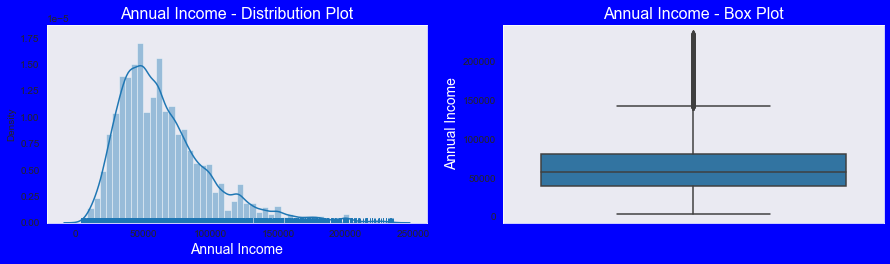

In [43]:
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df_fewer_nulls['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=df_fewer_nulls['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000


### Univariate Analysis - Unordered Categorical Variables - Loan Status

In [45]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'loan_status' column
df_fewer_nulls['loan_status_encoded'] = label_encoder.fit_transform(df_fewer_nulls['loan_status'])


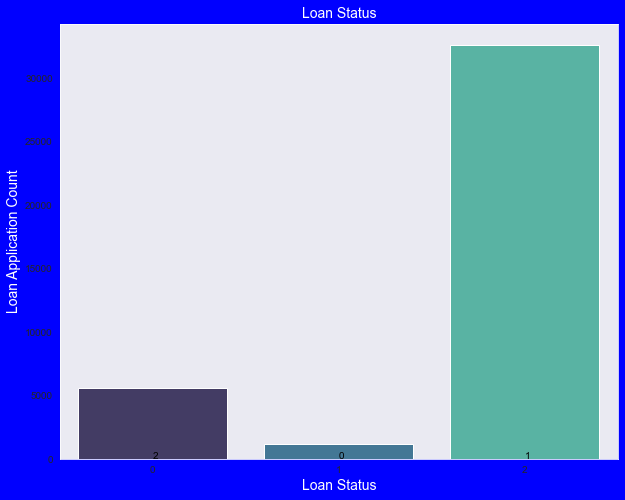

In [46]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status_encoded",data=df_fewer_nulls,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=df_fewer_nulls['loan_status_encoded'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status_encoded + 0.3 , v.loan_status_encoded, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

### Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

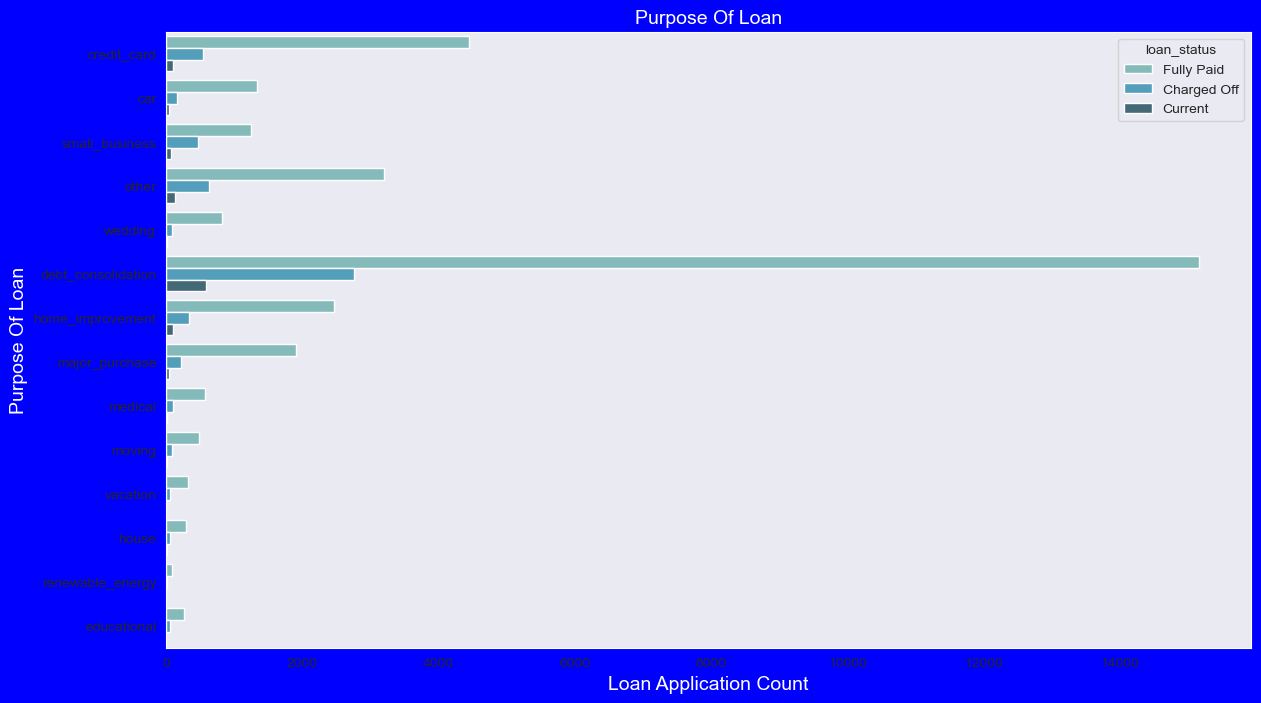

In [128]:
plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df_fewer_nulls,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

### Univariate Analysis - Unordered Categorical Variables - Home Ownership

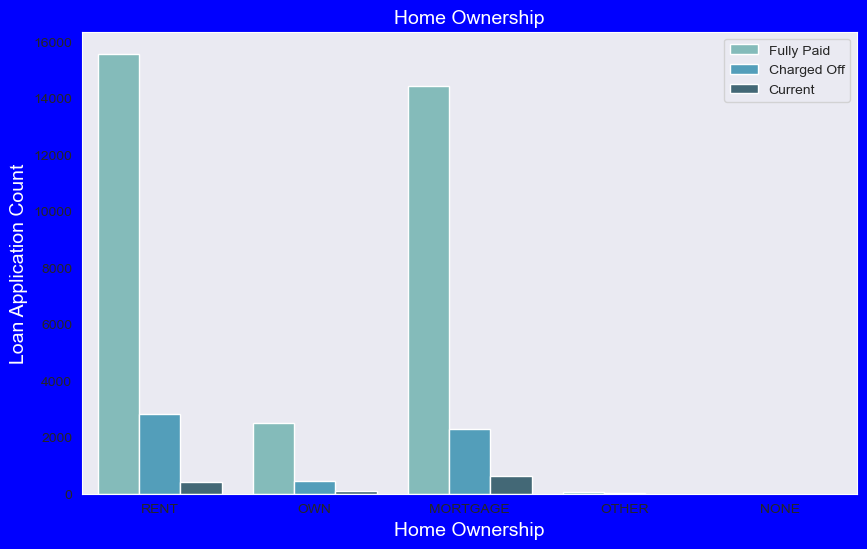

In [133]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=df_fewer_nulls,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgaged their home.
# Applicant numbers are high from these categories so charged off is high too.

### Derived Column - Ordered Categorical Variables
### Let us look into number of loans which were approved every year/month
### Lets use derived column year to check pattern of loan issuing over the years.

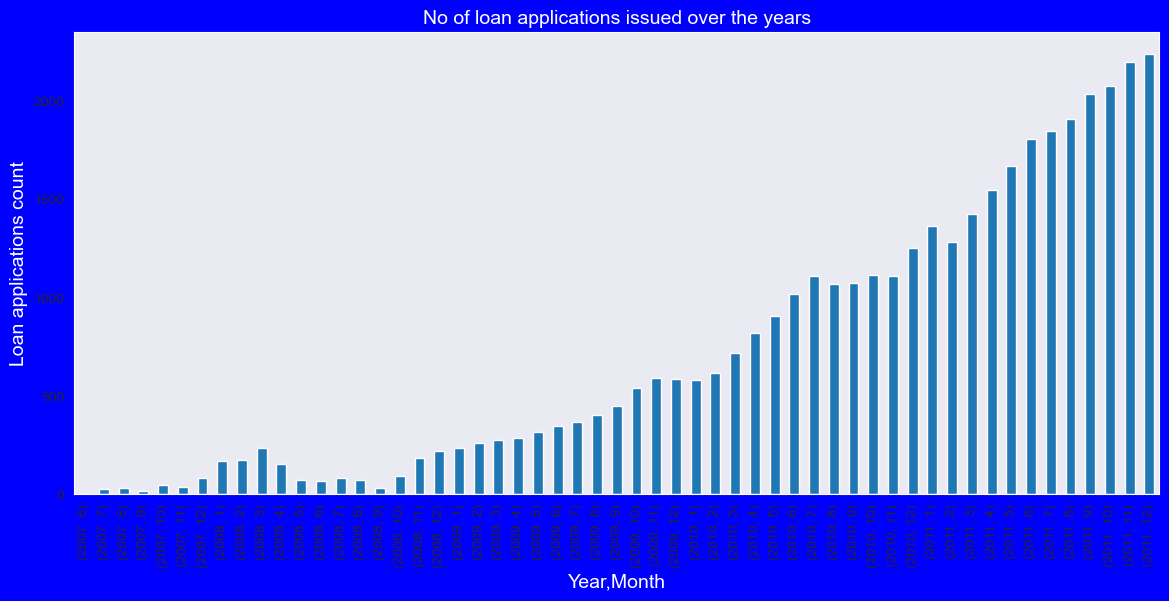

In [136]:
plt.figure(figsize=(14,6),facecolor='b')
df_fewer_nulls.groupby(['year','month']).member_id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()


# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to number of charged off applications.
# number of loans issued in 2008( May-October) got dipped, may be due to Recession.

### Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

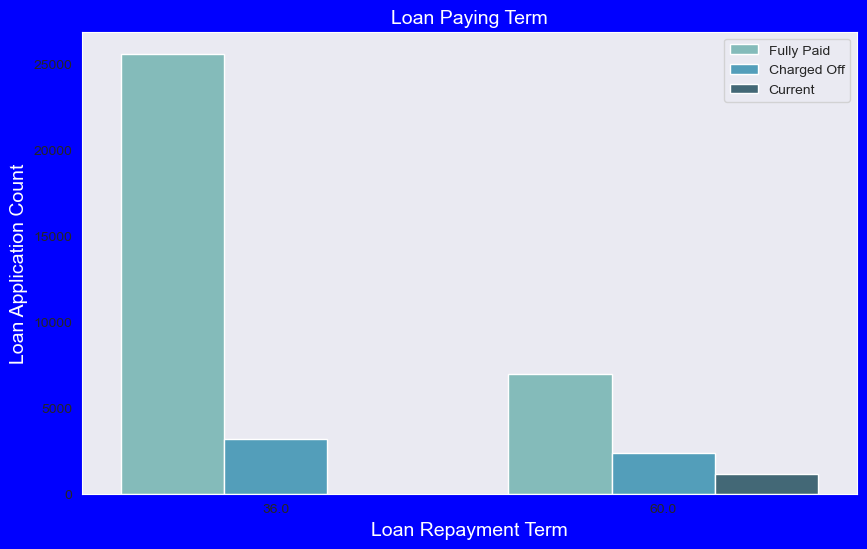

In [139]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=df_fewer_nulls,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

### Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

In [144]:
purpose_vs_loan = df_fewer_nulls.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,472.00,74.00,1251.00,1797.00,0.26
10,renewable_energy,19.00,1.00,81.00,101.00,0.19
3,educational,55.00,0.00,268.00,323.00,0.17
9,other,629.00,126.00,3203.00,3958.00,0.16
8,moving,91.00,7.00,479.00,577.00,0.16
5,house,58.00,14.00,299.00,371.00,0.16
7,medical,106.00,12.00,568.00,686.00,0.15
2,debt_consolidation,2752.00,580.00,15165.00,18497.00,0.15
12,vacation,53.00,6.00,322.00,381.00,0.14
4,home_improvement,338.00,97.00,2459.00,2894.00,0.12


### Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

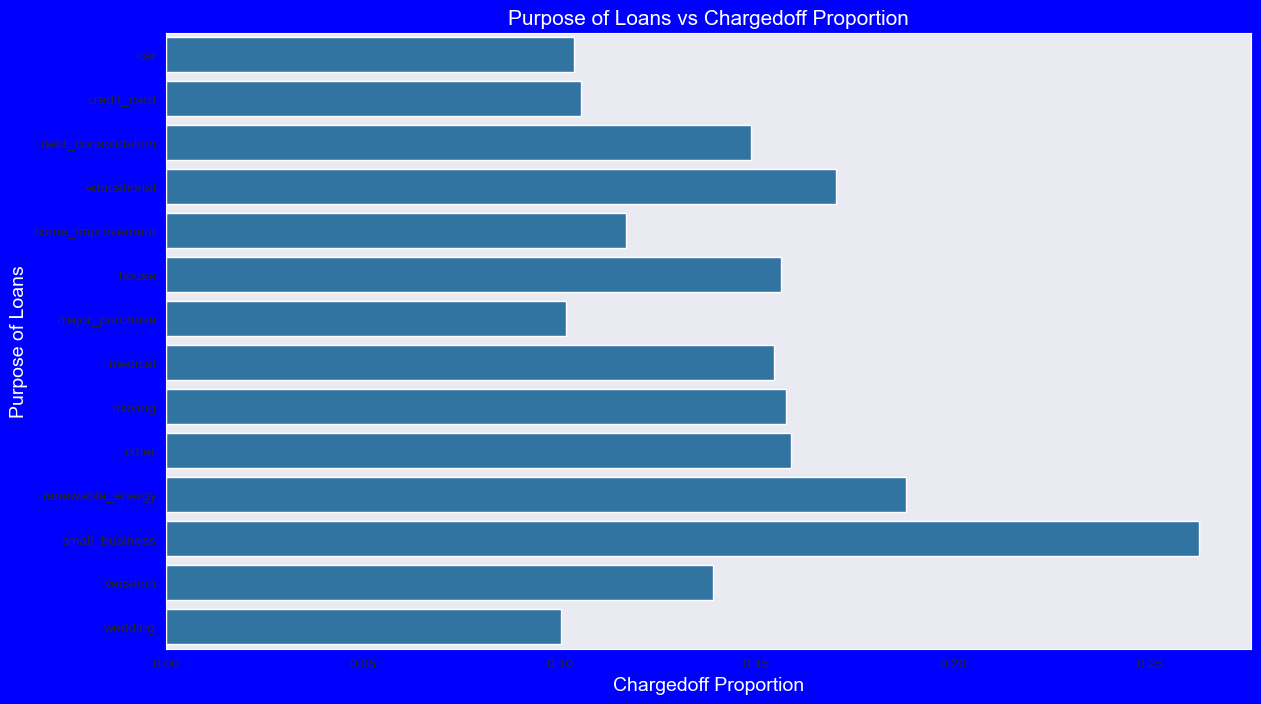

In [147]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where charged off proportion is better as compare to other categories.

### Bivariate Analysis on grade against Chargedoff_Proportion

In [152]:
grade_vs_loan = df_fewer_nulls.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,99,17,190,306,0.32
5,F,312,71,642,1025,0.30
4,E,704,176,1906,2786,0.25
3,D,1112,216,3916,5244,0.21
2,C,1342,262,6411,8015,0.17
1,B,1414,344,10167,11925,0.12
0,A,601,40,9377,10018,0.06


### Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

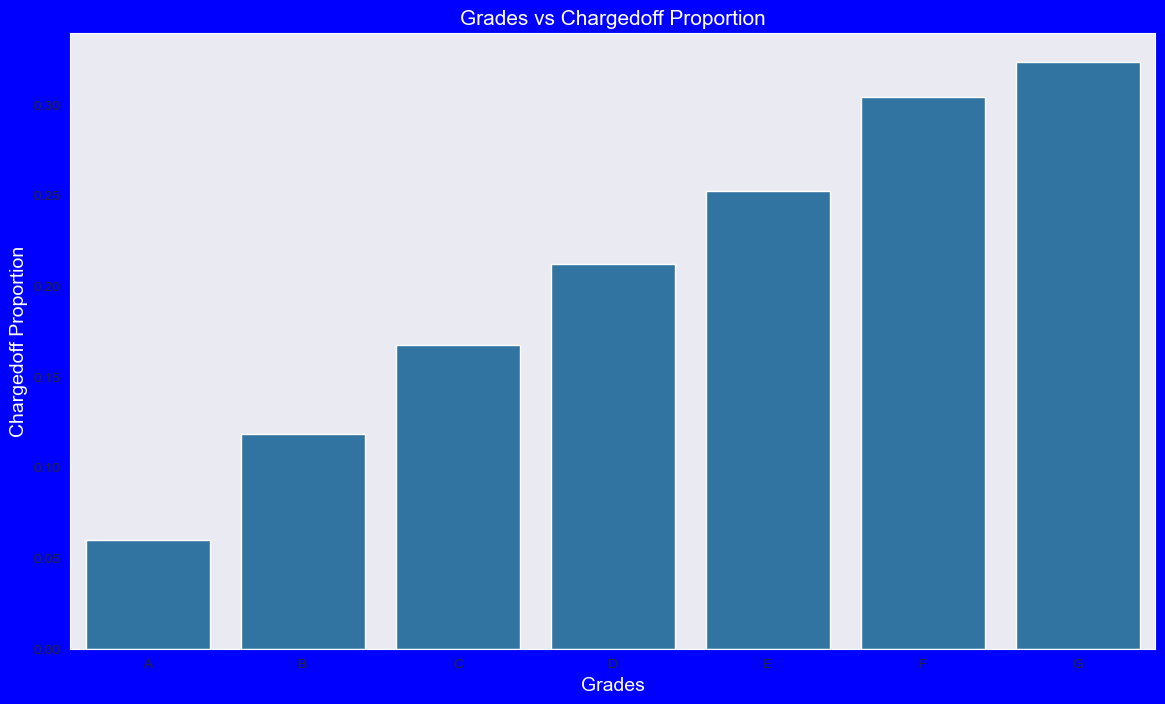

In [155]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

### Bivariate Analysis on sub grade against Chargedoff_Proportion

In [158]:
grade_vs_loan = df_fewer_nulls.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,53.00,4.00,55.00,112.00,0.47
32,G3,19.00,3.00,25.00,47.00,0.40
31,G2,27.00,1.00,47.00,75.00,0.36
34,G5,10.00,1.00,18.00,29.00,0.34
28,F4,52.00,17.00,96.00,165.00,0.32
30,G1,31.00,10.00,61.00,102.00,0.30
23,E4,126.00,28.00,293.00,447.00,0.28
26,F2,69.00,16.00,162.00,247.00,0.28
27,F3,50.00,11.00,118.00,179.00,0.28
25,F1,88.00,23.00,211.00,322.00,0.27


### Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

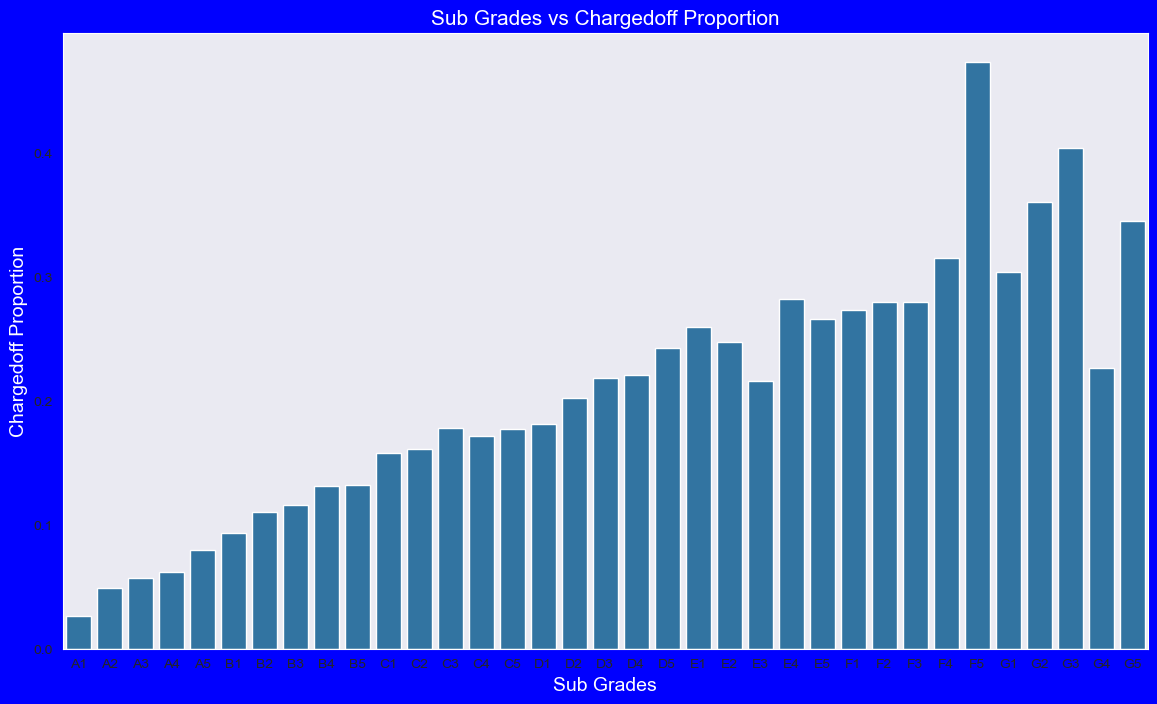

In [163]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

### Bivariate Analysis on employment length against Chargedoff_Proportion

In [166]:
emplen_vs_loan = df_fewer_nulls.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0,227,42,801,1070,0.21
10,10,1316,386,7038,8740,0.15
7,7,262,62,1435,1759,0.15
1,1,1090,143,6533,7766,0.14
5,5,456,87,2712,3255,0.14
8,8,203,43,1216,1462,0.14
6,6,305,58,1846,2209,0.14
3,3,551,82,3426,4059,0.14
4,4,456,94,2860,3410,0.13
2,2,561,97,3684,4342,0.13


### Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

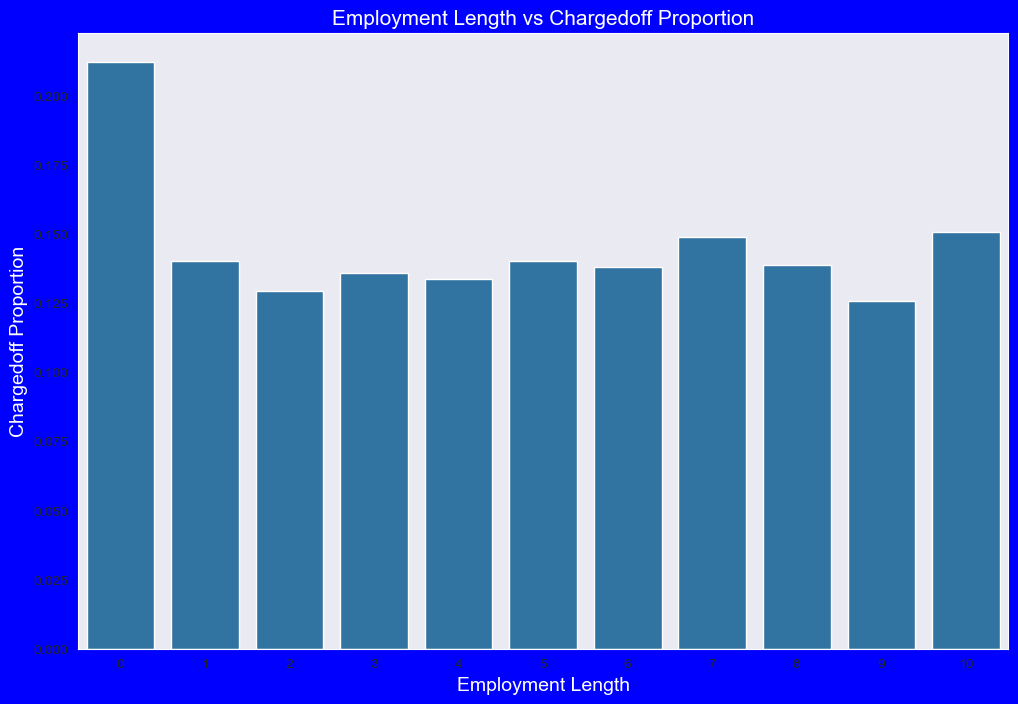

In [169]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

### Bivariate Analysis on address state against Chargedoff_Proportion

In [172]:
state_vs_loan = df_fewer_nulls.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.00,0.00,2.00,5.00,0.60
32,NV,107.00,17.00,368.00,492.00,0.22
40,SD,12.00,2.00,50.00,64.00,0.19
0,AK,14.00,2.00,63.00,79.00,0.18
9,FL,497.00,85.00,2252.00,2834.00,0.18
24,MO,114.00,16.00,551.00,681.00,0.17
13,ID,1.00,0.00,5.00,6.00,0.17
31,NM,30.00,5.00,149.00,184.00,0.16
11,HI,28.00,8.00,138.00,174.00,0.16
4,CA,1116.00,149.00,5767.00,7032.00,0.16


### Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

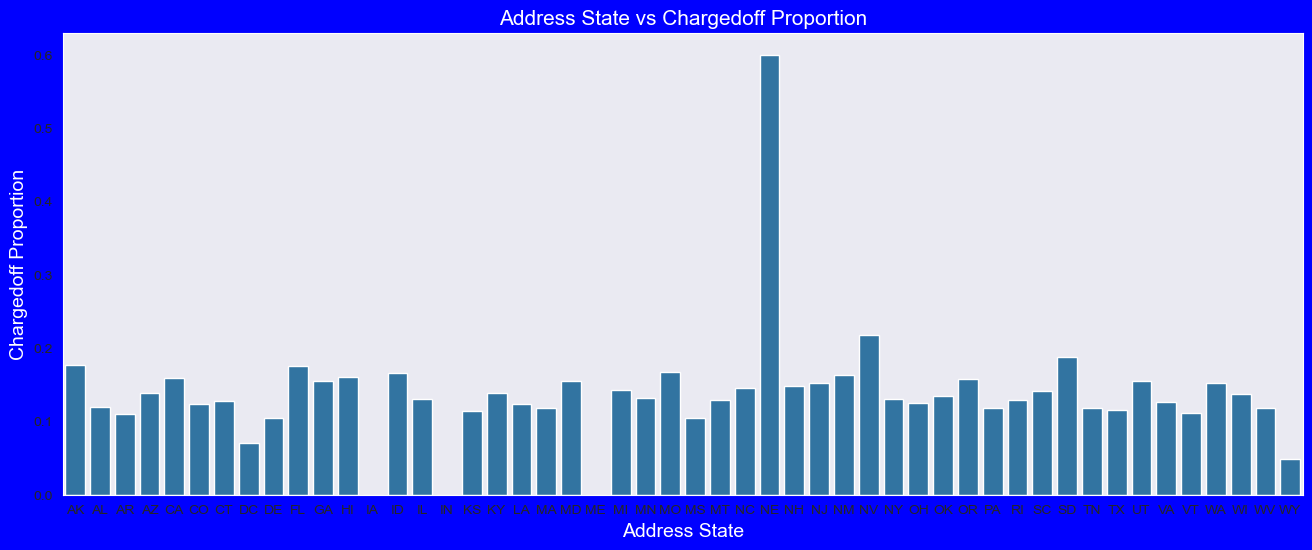

In [177]:
fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='b')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

### Bivariate Analysis on verification_status against Chargedoff_Proportion

In [180]:
verfy_vs_loan = df_fewer_nulls.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2032,593,10000,12625,0.16
1,Source Verified,1422,306,8135,9863,0.14
0,Not Verified,2130,227,14474,16831,0.13


### Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

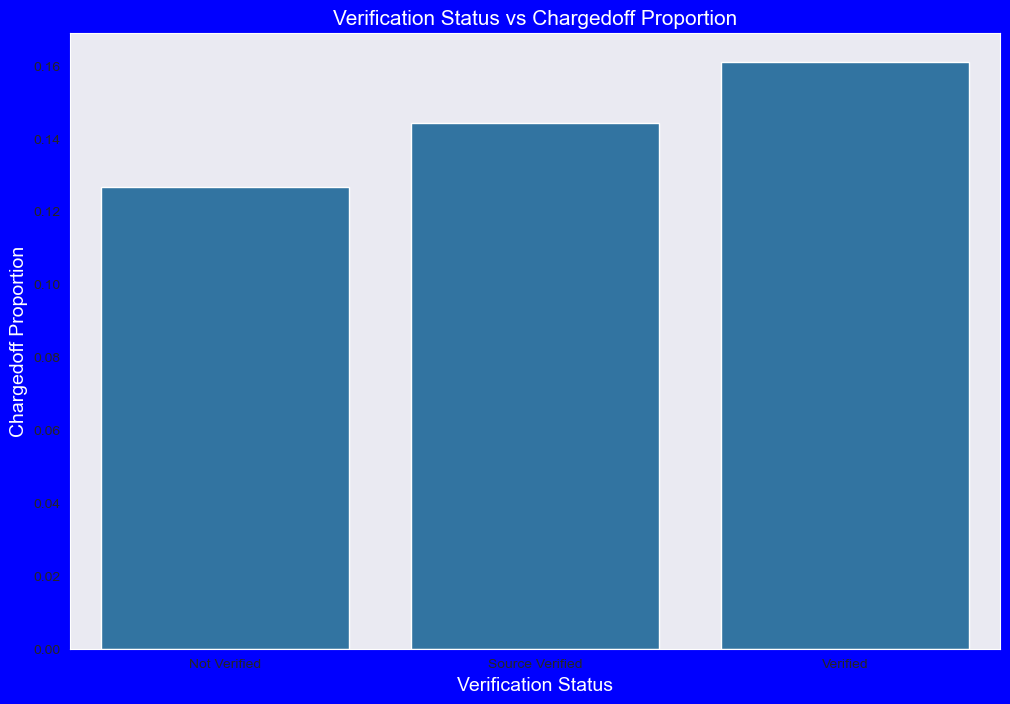

In [185]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

### Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

In [188]:
bankruptcies_vs_loan = df_fewer_nulls.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,2.00,2.00,2.00,3.00,7.00,0.29
1,1.00,365.00,37.00,1268.00,1670.00,0.22
3,Not Known,116.00,0.00,572.00,688.00,0.17
0,0.00,5101.00,1087.00,30766.00,36954.00,0.14


### Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

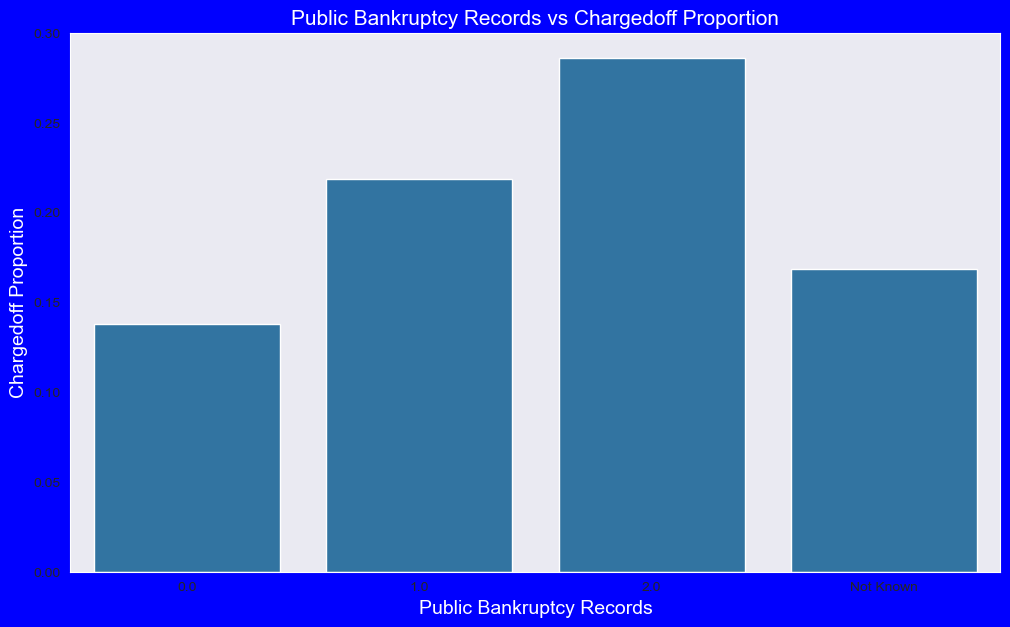

In [192]:
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

### Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

In [196]:
bankruptcies_vs_loan = df_fewer_nulls.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,1,454.00,43.00,1551.00,2048.00,0.22
2,2,10.00,3.00,37.00,50.00,0.20
0,0,5120.00,1080.00,31012.00,37212.00,0.14
3,3,0.00,0.00,7.00,7.00,0.00
4,4,0.00,0.00,2.00,2.00,0.00


### Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

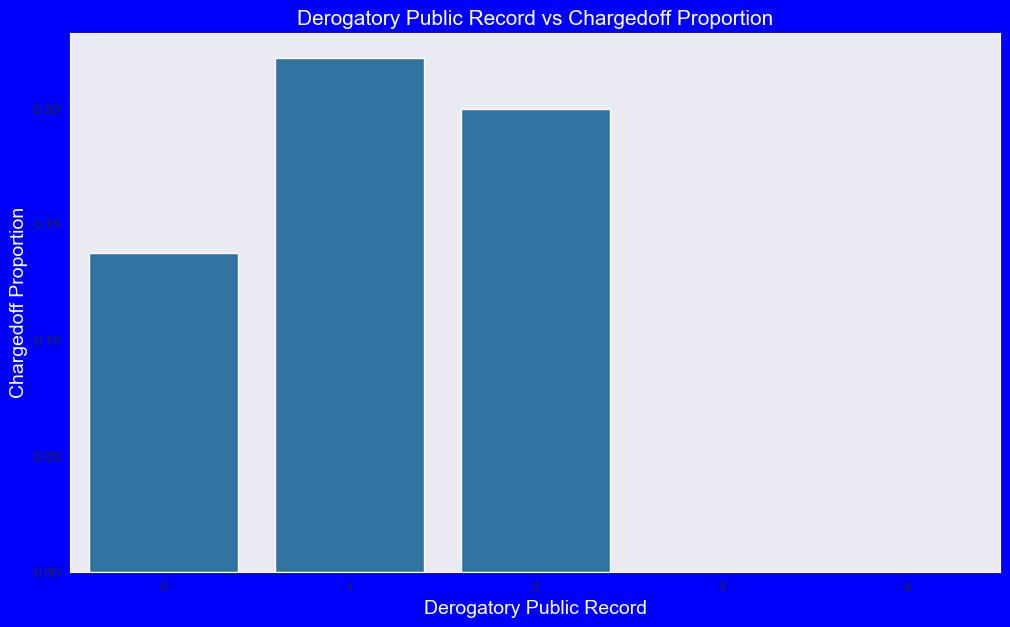

In [201]:
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

### Bivariate Analysis - Box Plot - Puprose of loan vs Loan amount

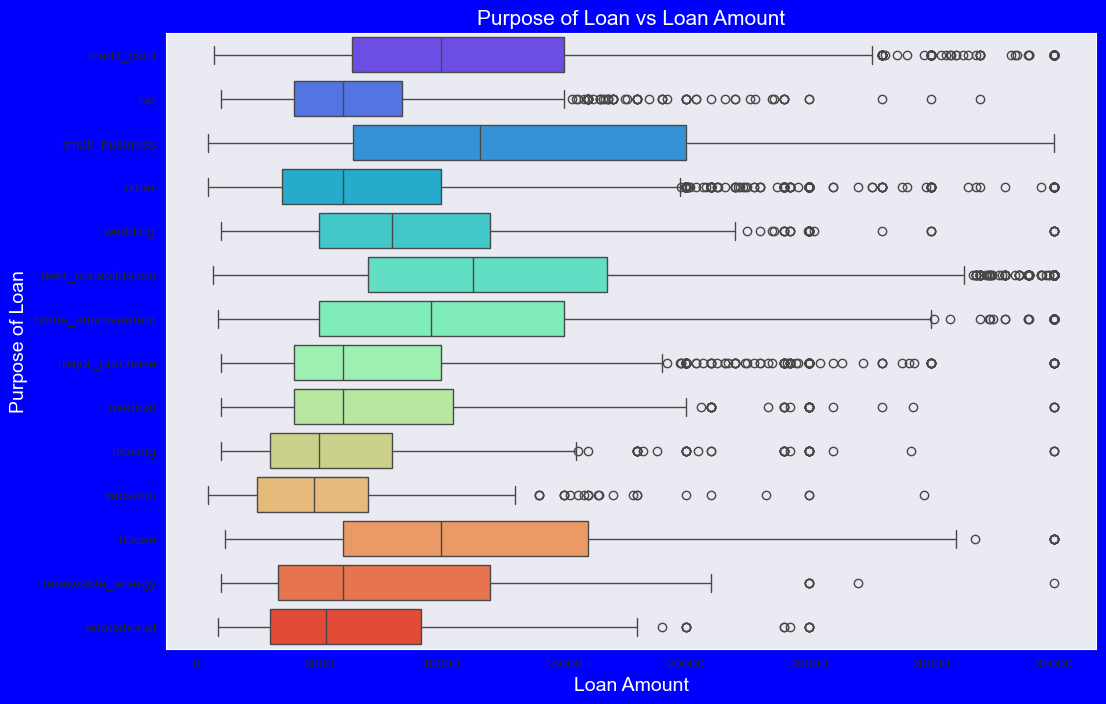

In [204]:
plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df_fewer_nulls,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

### Bivariate Analysis - Puprose of loan vs Loan amount
### Violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. 

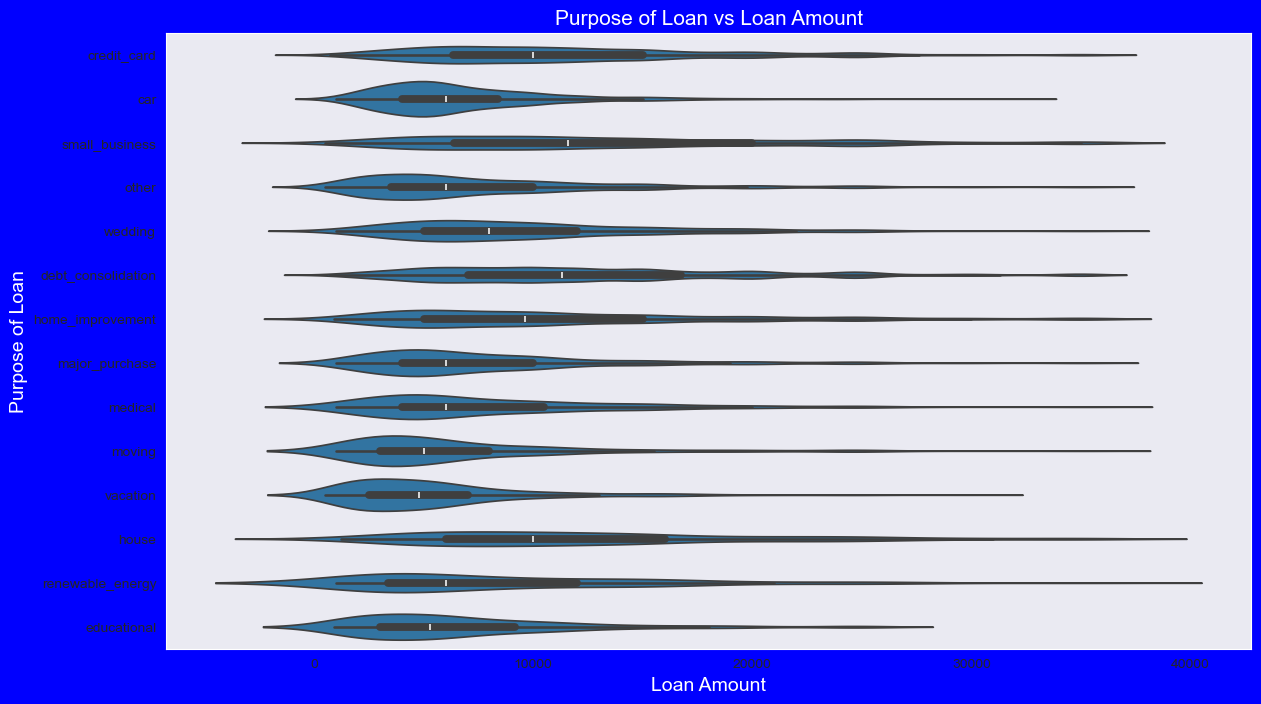

In [207]:
plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =df_fewer_nulls)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.

### Bivariate Analysis - Box Plot - Term of loan vs Interest Rate

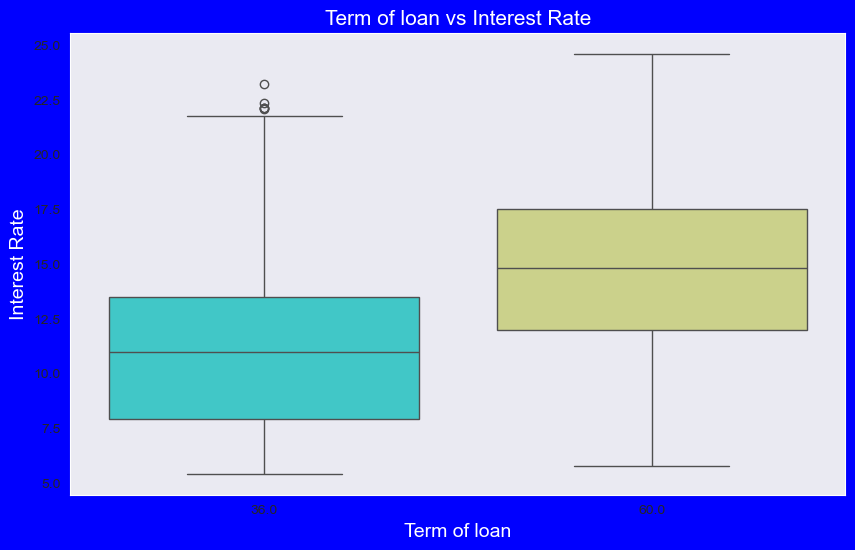

In [210]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =df_fewer_nulls,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

### Bivariate Analysis - Box Plot - Purpose vs Interest Rate

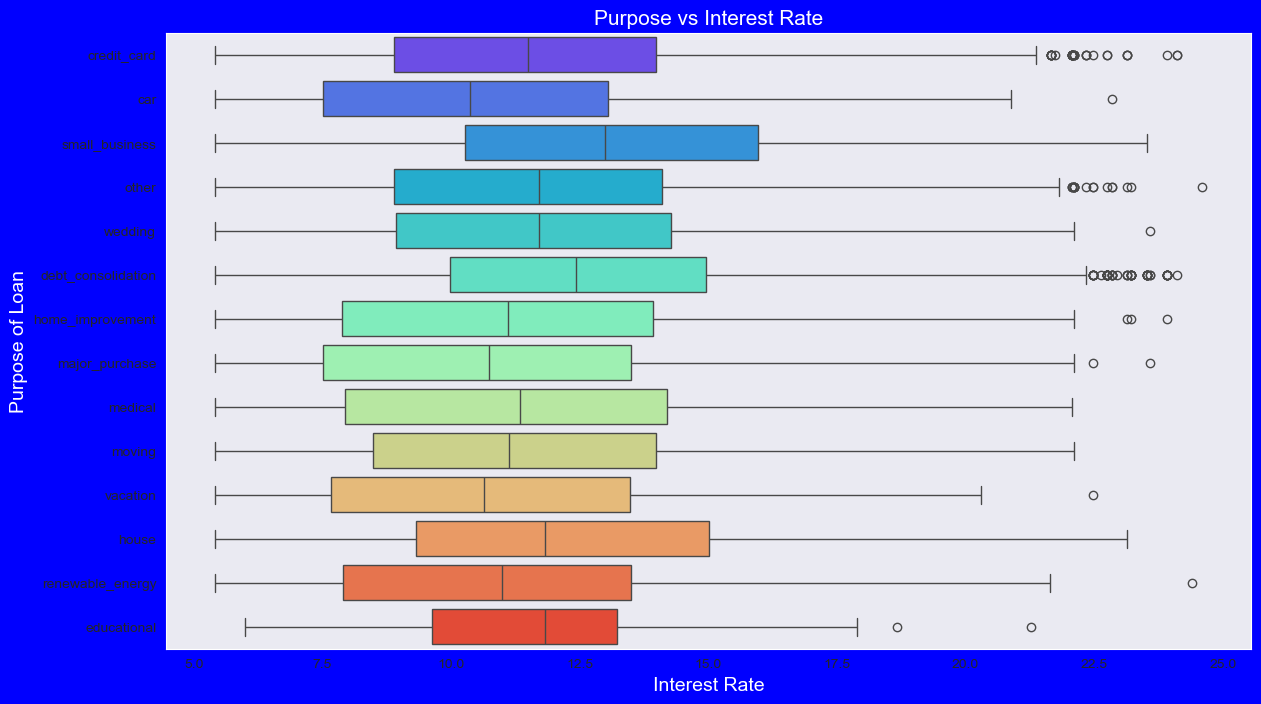

In [213]:
plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =df_fewer_nulls,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

### Bivariate Analysis - Box Plot - Grade vs Interest Rate

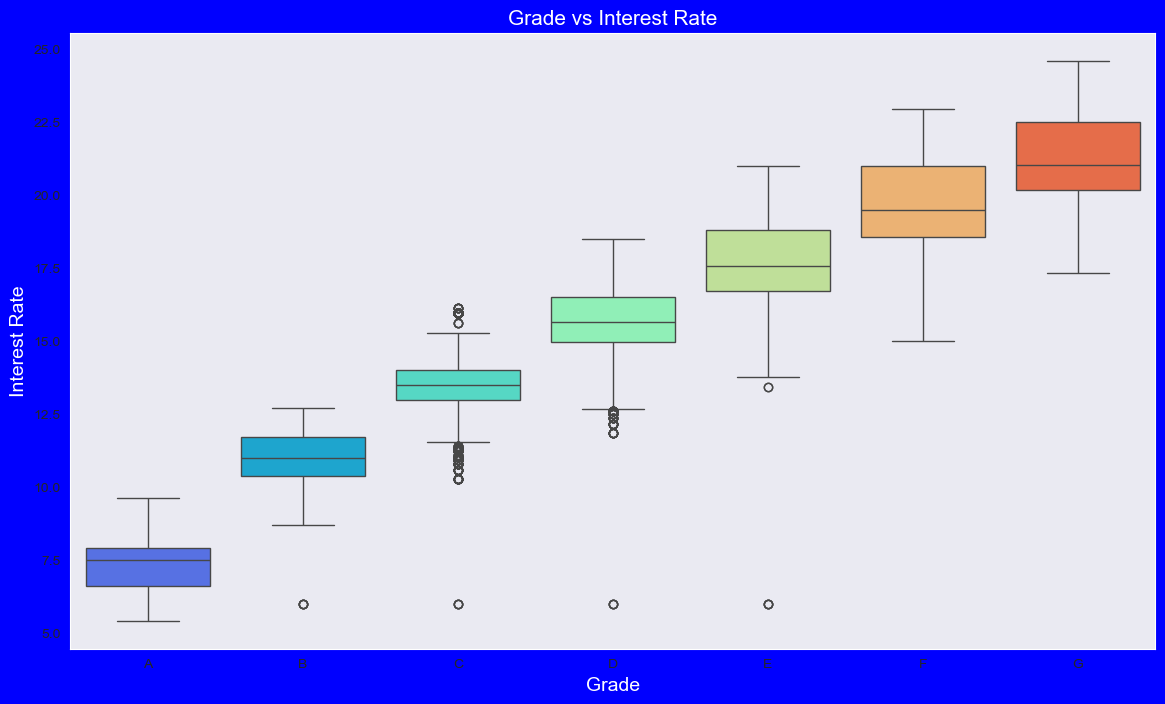

In [218]:
plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='grade', data =df_fewer_nulls,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that intrest rate is increasing with grades moving from A to F.

### Lets draw a pair plot for multivariate analysis
### Pick few important columns from dataset separately.
### Take the log of below variables as they are heavily skewed
### Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.

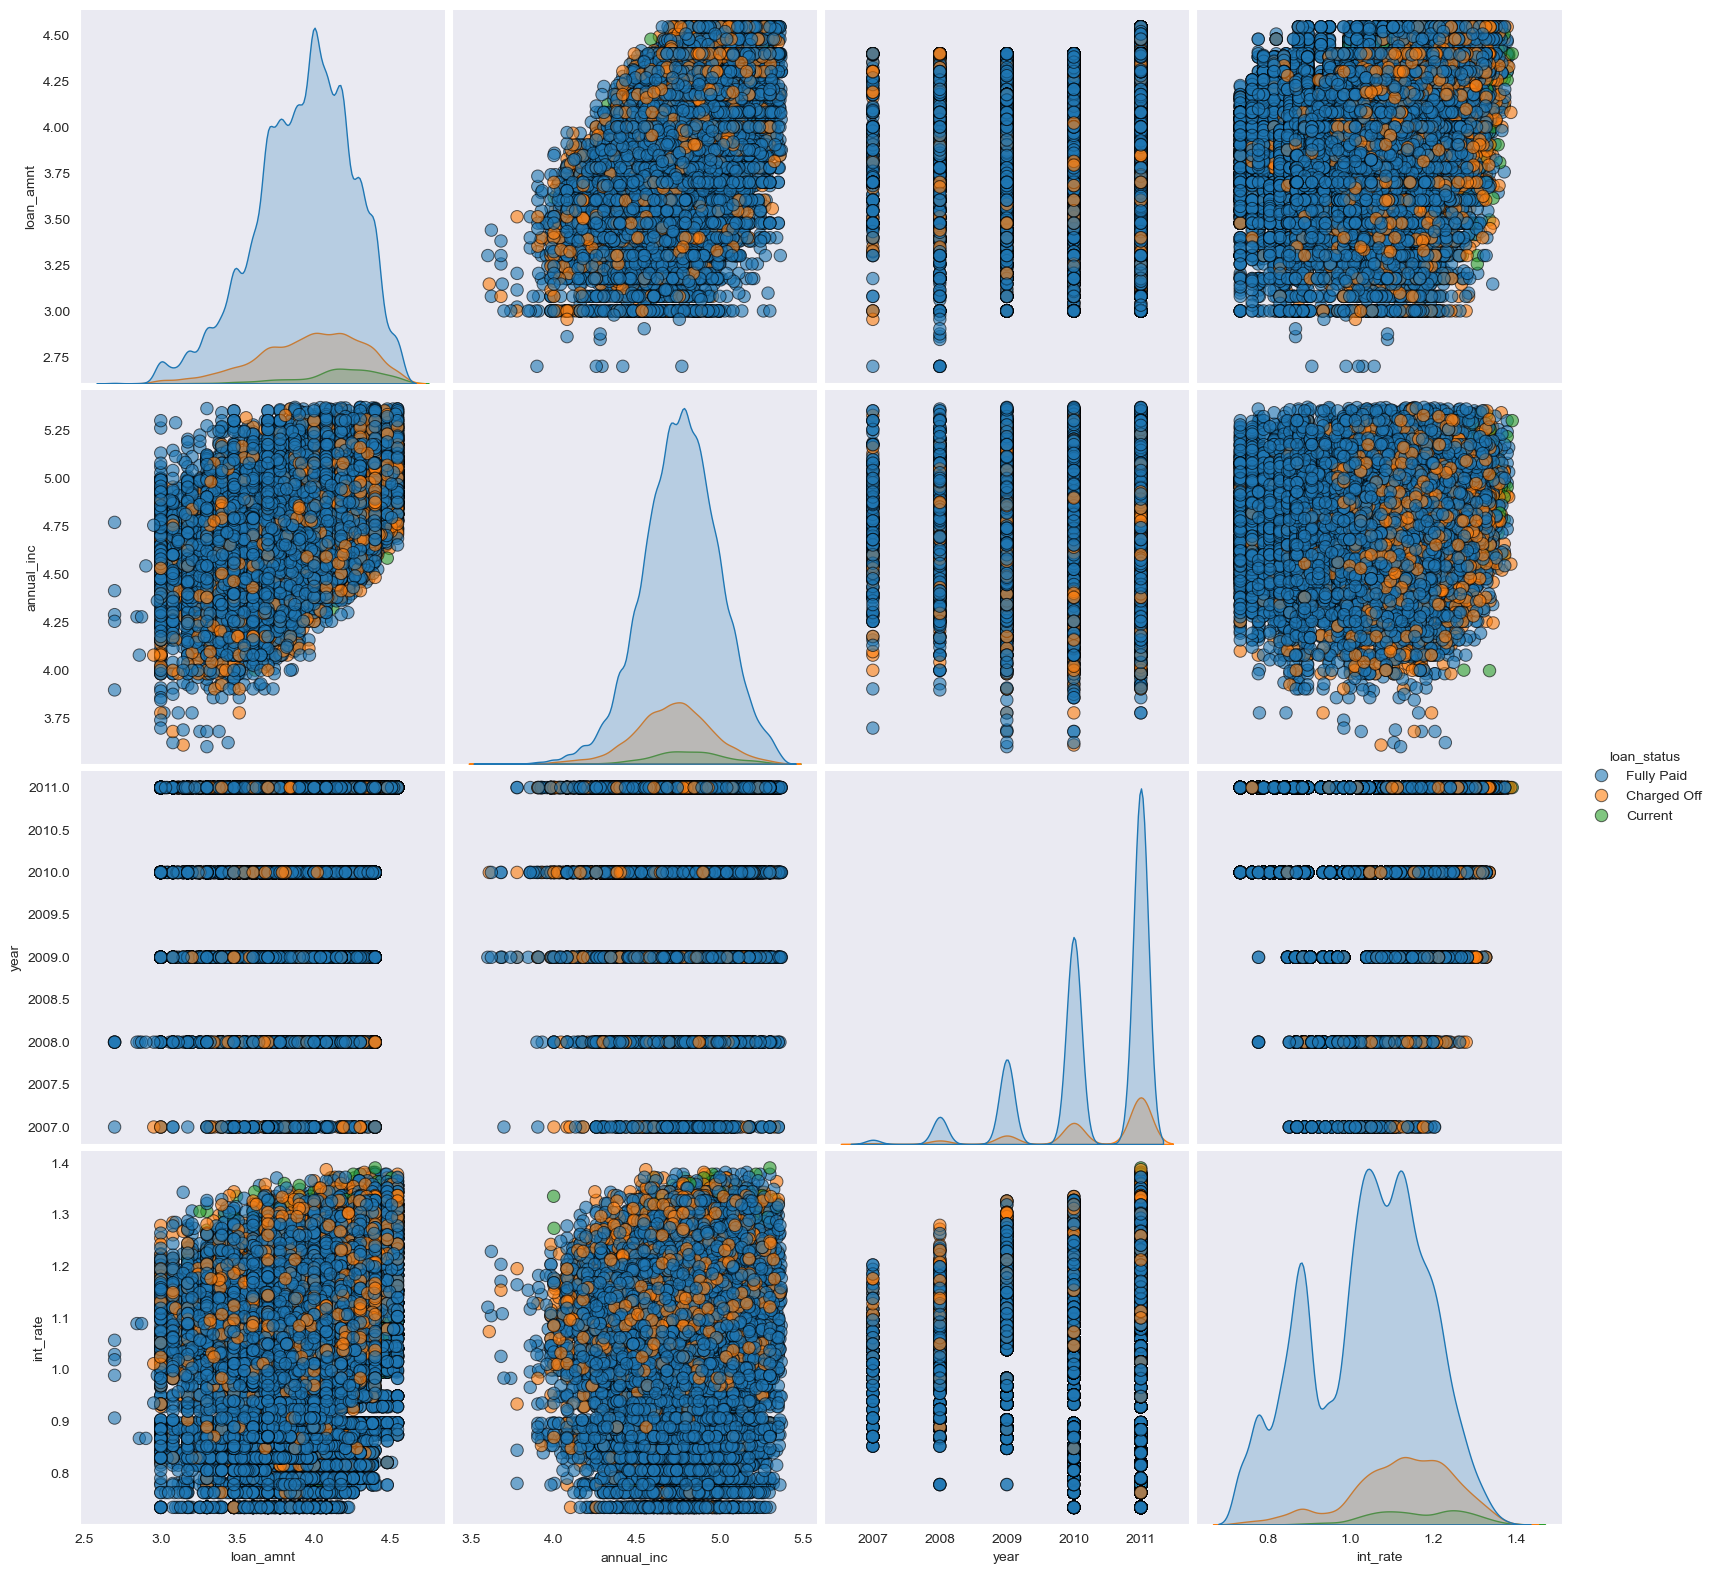

In [222]:
loan_pair = df_fewer_nulls[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()


loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.
# increase in number of charged off with increase in year.
# intrest rate is increasing with loan amount increase

<Axes: >

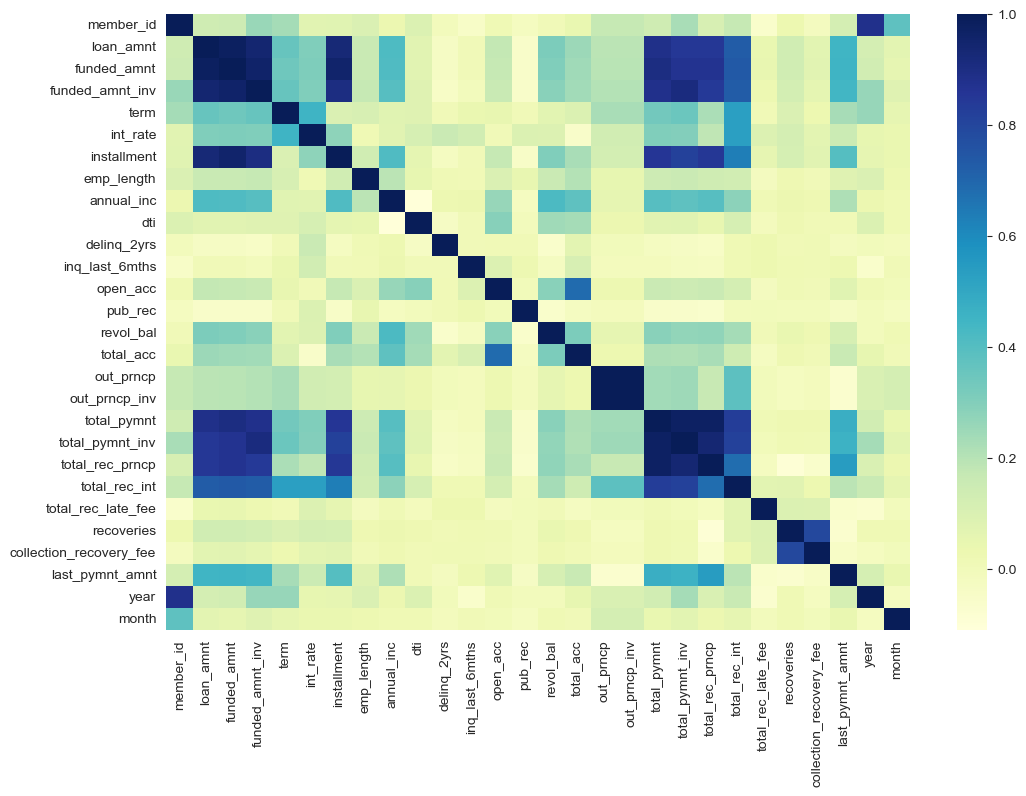

In [232]:
df_numeric = df_fewer_nulls.select_dtypes(include=np.number)

cont_cols = df_numeric.columns.to_list()

col_list=["policy_code","acc_now_delinq","delinq_amnt"]
#heatmap_cols=df_fewer_nulls.drop[columns=col_list,axis=1]
thlist_cleaned = [col for col in cont_cols if col not in col_list]

plt.figure(figsize=(12,8))
sns.heatmap(df_fewer_nulls[thlist_cleaned].corr(),cmap="YlGnBu")

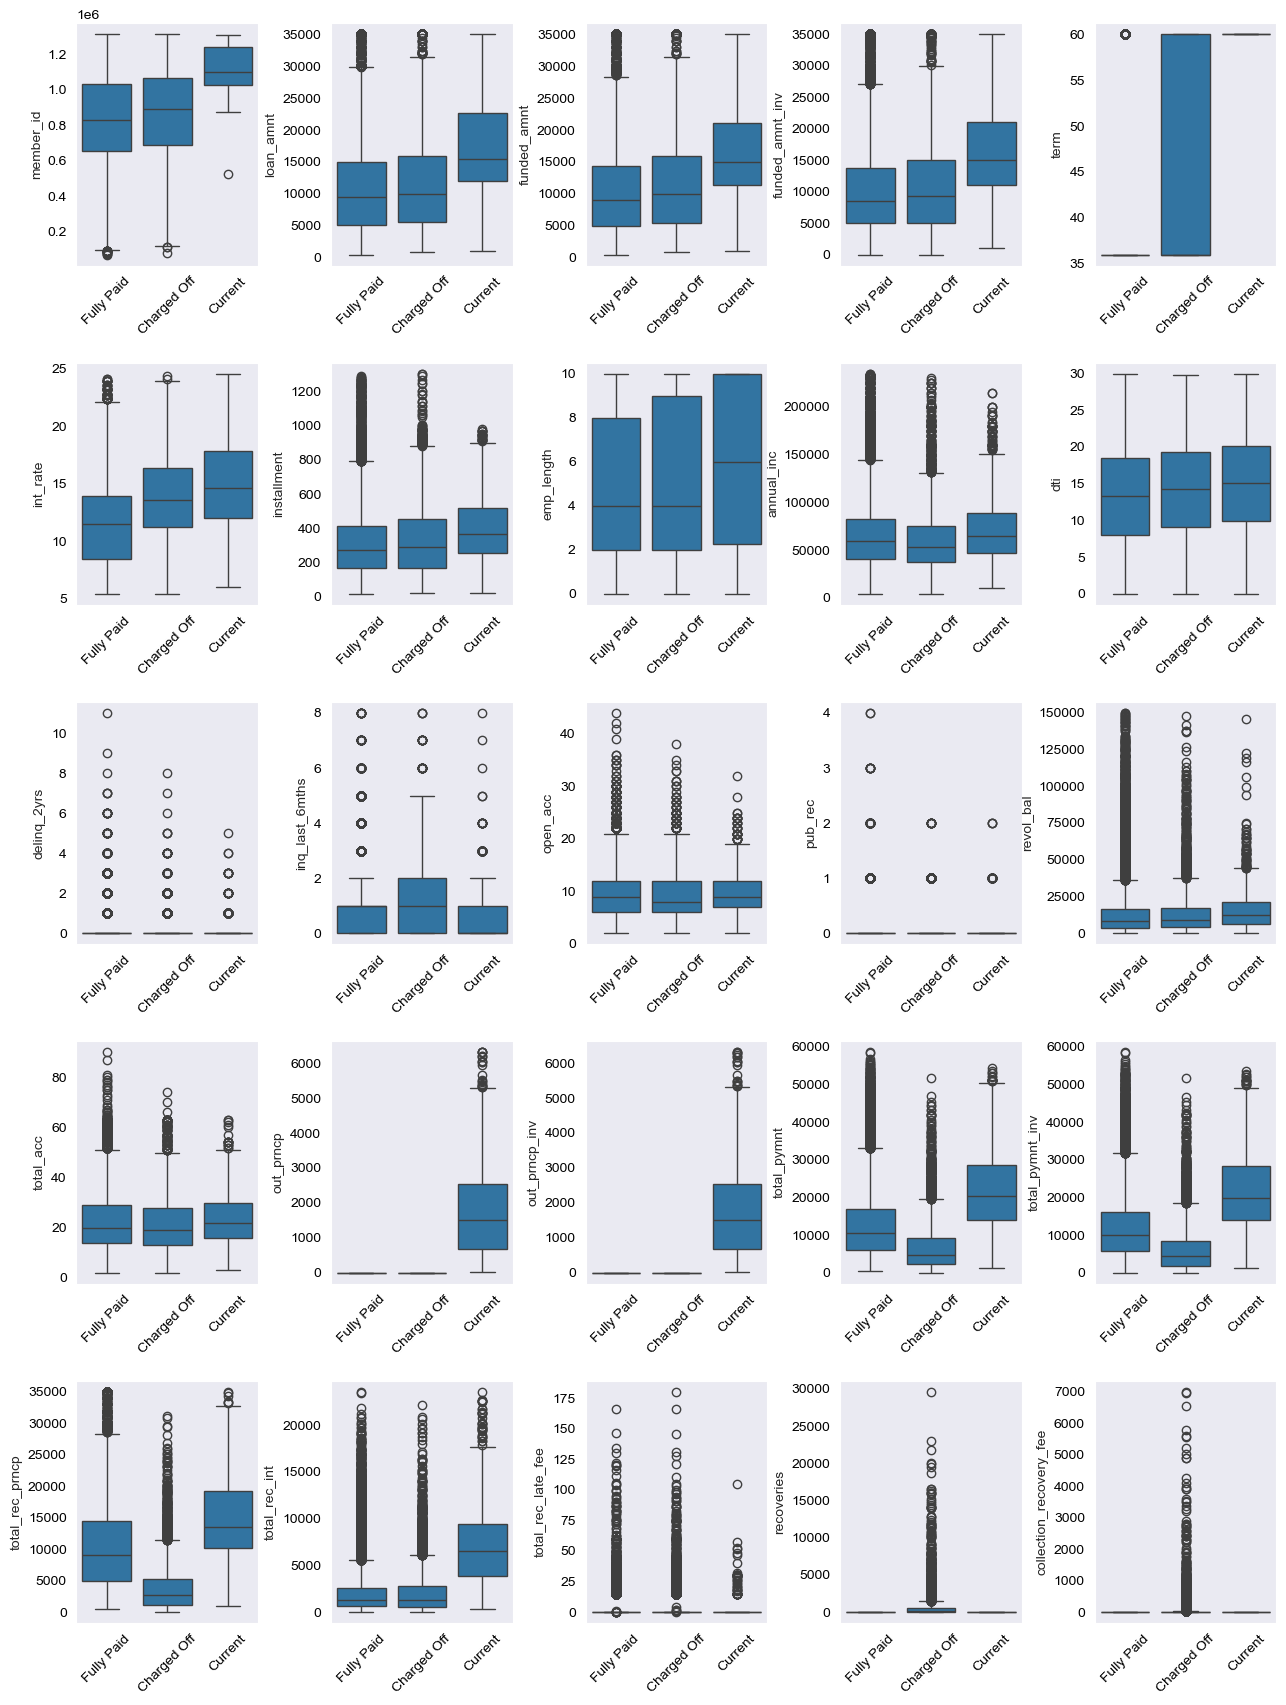

In [338]:
df_numeric = df_fewer_nulls.select_dtypes(include=np.number)

cont_cols = df_numeric.columns.to_list()

fig, axes = plt.subplots(5,5, figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for col, ax in zip(cont_cols, axes.flatten()):
    sns.boxplot(y=col, x= "loan_status", data=df_fewer_nulls, orient='v', ax=ax)
    ax.tick_params(colors="black", which="both")
    ax.set_xticklabels(['Fully Paid', 'Charged Off', 'Current'], rotation=45,color="black")
    ax.set(xlabel=None)
plt.show()

### CONCLUSIONS

In [ ]:
# Borrowers with high interest and 10+ years of employment length.
# Borrowers living on mortgage with loan amount greater than 12000.
# Loan for debt consolidation, credit card, small business with loan amount greater than 12000.
# For any loan amount provided with an average interest rate higher than 13%.
# Loan provided for house purpose with average interest greater than 15%.
# Loan provided with an average of 12.5% interest rate for 36 months of tenure.
# Loan provided with an average of 16.5% interest rate for 60 months of tenure.
# Average loan amount greater than 15000 with grade E, F, G.
# Installments between 800 - 12000 with average interest greater than 15%.
# Average interest rate of 17% with installment greater than 12000.

In [ ]:
### RECOMMENDATIONS

In [ ]:
# Limit the loan amount to 12000 for applicants with ownership of mortgage. This also show financial status of a risky applicant.
# To encourage small business but also evaluate the risk appetite of  investors profile. 
# The rate of interest for applicants for small business can be reduced around 2%
# ssssIncrease the rate of interest by 0.5% to the loan amount for applicants whose purpose is moving, as the loan amount is less and are more likely to repay.
